Construcción de Lévy del movimiento browniano.

In [1]:
using Distributions
using Plots

#Construcción de Lévy del movimiento browniano en el intervalor [0,T]
function LevyBM(T,N)
M=2^N   
dt=1/M
t=0:dt:T         #racionales diádicos
xi0 = randn()    #muestreo normal inicial
Y0=xi0*t         
Y0vec=zeros(M+1)
for i=1:M+1        #interpolación entre 0 y xi0
    Y0vec[i]=Y0[i]
end

Y=zeros(N+1,M+1);    #aquí almacenaremos cada iteración
for j=1:2^N+1
    Y[1,j]=Y0[j]     #condición inicial primer tiempo
end

#Comenzamos la iteración
for n=1:N
    ind1=zeros(2^(n-1)+1)     #almacenaremos los índices correspondientes a los números diádicos de orden n
    for i=1:2^(n-1)+1
        ind1[i] = (2^(N))*t[Int(2^(N-n+1)*(i-1))+1]+1
    end
    for i=2:Int(2^(n-1)+1)
        Y[n+1,Int(ind1[i-1])] = Y[n,Int(ind1[i-1])]
        Y[n+1,Int(ind1[i])] = Y[n,Int(ind1[i])]
        ind2 = Int((ind1[i-1]+ind1[i])/2)
        Y[n+1,ind2] = (Y[n,Int(ind1[i-1])]+Y[n,Int(ind1[i])])/2+rand()/(sqrt(2^(n+1)))
        
        for j=Int(ind1[i-1]):ind2
            Y[n+1,j] = Y[n+1,Int(ind1[i-1])]+(t[j]-t[Int(ind1[i-1])])*(Y[n+1,ind2]-Y[n+1,Int(ind1[i-1])])/(t[ind2]-t[Int(ind1[i-1])])
        end
        for j=ind2:Int(ind1[i])
            Y[n+1,j] = Y[n+1,ind2]+(t[j]-t[ind2])*(Y[n+1,Int(ind1[i])]-Y[n+1,ind2])/(t[Int(ind1[i])]-t[ind2])
        end
    end
    
end

return t,Y[:,:]

end

LevyBM (generic function with 1 method)

[ Info: Saved animation to C:\Users\jonan\Paro optimo y soluciones de viscosidad\anim_fps15.gif


Plots.AnimatedGif("C:\\Users\\jonan\\Paro optimo y soluciones de viscosidad\\anim_fps15.gif")
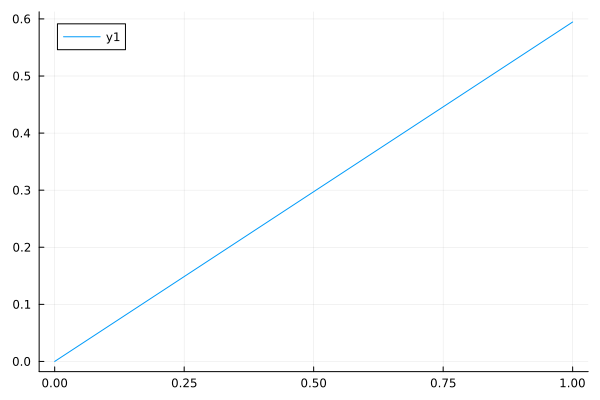

In [2]:
#plot(t,B[1,:])
N=15
tB = LevyBM(1,N)
t=tB[1]
B=tB[2]
anim = @animate for i ∈ 1:N-5
    plot(t,B[i,:])
end
gif(anim, "anim_fps15.gif", fps = 1)